# 08 Assignment - Page Rank

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

**Question 1**

Consider any $2×2$ matrix $A$ and apply the matrix on a $2×1$ vector $v$. Keep applying this matrix and notice that the direction converges, while the magnitude may get larger. Keep normalizing $v$ and notice the direction to which it converges. Use Numpy

In [ ]:
someMatrix = np.array([
    [1,2],
    [3,4]
])

someVector = np.array([2,3])

print(f"Shape of Matrix: {someMatrix.shape}")
print(f"Shape of Vecotr: {someVector.shape}")

Shape of Matrix: (2, 2)
Shape of Vecotr: (2,)


In [ ]:
def angleBetween(v1, v2):
    unit_v1 = v1/np.linalg.norm(v1)
    unit_v2 = v2/np.linalg.norm(v2)
    # Finding cos inverse of dot product to get angle in radians
    # Convertring to degree
    return 360*(np.arccos(np.dot(unit_v1, unit_v2))) / (2*np.pi)

In [ ]:
x_axis = np.array([1,0])
someVectorAngle = [angleBetween(someVector, x_axis)]

for _ in range(999):
    someVector = np.matmul(someMatrix, someVector)
    someVector = someVector/np.linalg.norm(someVector)
    someVectorAngle.append(angleBetween(someVector, x_axis))

In [ ]:
np.linalg.eig(someMatrix)

(array([-0.37228132,  5.37228132]),
 array([[-0.82456484, -0.41597356],
        [ 0.56576746, -0.90937671]]))

In [ ]:
prin_eig = np.linalg.eig(someMatrix)[1][:,1]

In [ ]:
prin_eig, someVector

(array([-0.41597356, -0.90937671]), array([0.41597356, 0.90937671]))

<matplotlib.legend.Legend>

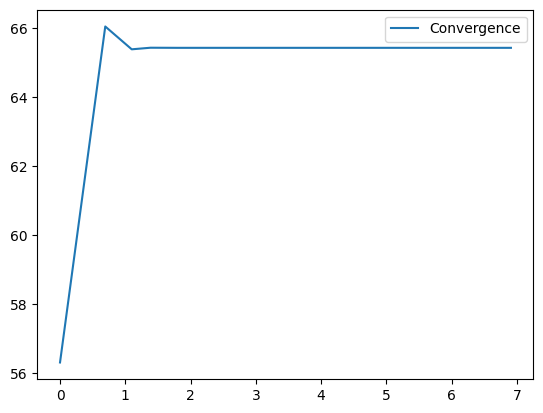

In [ ]:
x = list(range(1,1001))
y = [angleBetween(prin_eig, x_axis)]*1000
plt.plot(np.log(x),someVectorAngle, label="Convergence")
plt.legend()

**Question 3**

<img src="https://drive.google.com/uc?export=view&id=189hPbwFcWbEFA82Khxu95HYqVi-nP2Wr"  width="70%" height="70%">

In [ ]:
ProbabilityMatrix = np.array([
        [0,0,0,0.5,0.5,1,1,1],
        [0.5,0,0,0,0,0,0,0],
        [0.5,0,0,0,0,0,0,0],
        [0,0.5,0,0,0,0,0,0],
        [0,0.5,0,0,0,0,0,0],
        [0,0,0.5,0,0,0,0,0],
        [0,0,0.5,0,0,0,0,0],
        [0,0,0,0.5,0.5,0,0,0]
    ])


In [ ]:
np.linalg.eig(ProbabilityMatrix)[1][:,0]/np.linalg.norm(np.linalg.eig(ProbabilityMatrix)[1][:,0])

array([0.74278135+0.j, 0.37139068+0.j, 0.37139068+0.j, 0.18569534+0.j,
       0.18569534+0.j, 0.18569534+0.j, 0.18569534+0.j, 0.18569534+0.j])

In [ ]:
np.linalg.matrix_power(ProbabilityMatrix, 1000)[:,0]*2.4141

array([0.7428, 0.3714, 0.3714, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857])

**Question 4**

Write down the edge list of the above graph and use networkx to run a random walk on it. What is the distribution of visits?

In [ ]:
graph = {
    'a': ['b', 'c'],
    'b': ['d', 'e'],
    'c': ['f', 'g'],
    'd': ['a', 'h'],
    'e': ['a', 'h'],
    'f': ['a'],
    'g': ['a'],
    'h': ['a']
}

In [ ]:
pointer = random.choice(list(graph.keys()))
visits = {k:0 for k,v in graph.items()}
for _ in range(8000):
    pointer = random.choice(graph[pointer])
    visits[pointer] += 1

In [ ]:
pointer = random.choice(list(graph.keys()))
visits = {k:0 for k,v in graph.items()}
for _ in range(10000):
    for _ in range(1000):
        pointer = random.choice(graph[pointer])
    visits[pointer] += 1

[<matplotlib.lines.Line2D>]

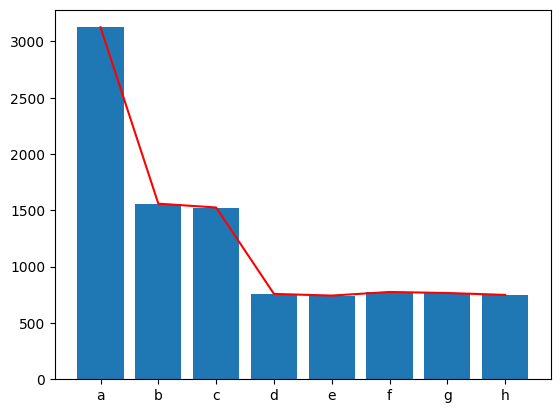

In [ ]:
nodes = list(visits.keys())
values = list(visits.values())
plt.bar(nodes, values)
plt.plot(nodes,values, color='red')

**Question 5**

Are the following two questions equivalent?:

* If I were to give pocket money to two of my daughters: 500 rupees each.

* I toss a coin and give my elder daughter 1000 rupees if its heads or the younger daughter 1000 rupees if its tails.

* Are these two statements equivalent? In the sense that, by the end of the year, do you think both my daughters would have received, more or less, the same amount of money?

In [ ]:
# Case 1 - Always Rs.500

younger_daughter_equal = 0
elder_daughter_equal = 0

yd_eq_list = []
ed_eq_list = []

for _ in range(365):
    younger_daughter_equal += 500
    yd_eq_list.append(younger_daughter_equal)
    elder_daughter_equal += 500
    ed_eq_list.append(elder_daughter_equal)

In [ ]:
# Case 2 - Giving Rs.1000 based on Toss Coin.

younger_daughter_coin = 0
elder_daughter_coin = 0

yd_coin_list = []
ed_coin_list = []

for _ in range(365):
    if random.choice([0,1]):
        younger_daughter_coin += 1000
        yd_coin_list.append(younger_daughter_coin)
        ed_coin_list.append(elder_daughter_coin)
    else:
        elder_daughter_coin += 1000
        ed_coin_list.append(elder_daughter_coin)
        yd_coin_list.append(younger_daughter_coin)

<matplotlib.legend.Legend>

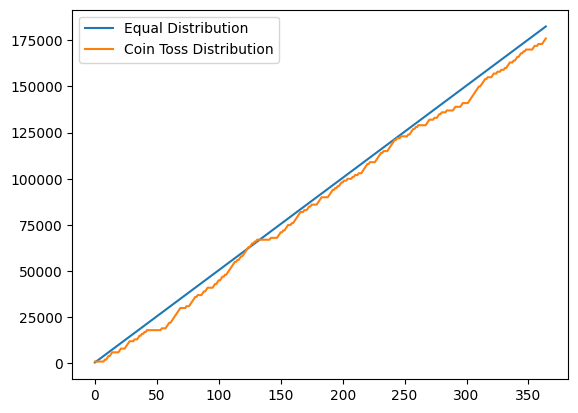

In [ ]:
plt.plot(list(range(365)), yd_eq_list, label="Equal Distribution")
plt.plot(list(range(365)), yd_coin_list, label="Coin Toss Distribution")
plt.legend()

**Question 6**
Consider the adjacency matrix of the above graph, tweak it and observe that the principal eigen vector is same as the answer to the previous question. (Principal Eigen Vector is defined as the eigen vector corresponding to the highest eigen value)
--- INCORRECT QUESTION ---

**New Question 6**
Solve for Two Simultaneous Equations

In [ ]:
def findIntersection(slope1, intercept1, slope2, intercept2):
    if slope1 == slope2:
        return -1
    x = (intercept1-intercept2)/(slope2-slope1)
    return (x, slope1*x+intercept1)

In [ ]:
findIntersection(0,0,1,0)

(0.0, 0.0)

**Question 7**

Can you consider a network of vertices, in the order of thousands and figure out the answer? You will observe that the best method to use is the random walk (with teleportation). why?

If the number of vertices are very high like thousands, the method to calculate eigen vectors requires matrix multiplications which is $O(n^2)$, where as a random walk is a linear operation.